In [13]:
import numpy as np
import pandas as pd

## DOM分析

In [14]:
df = pd.read_excel('deterministic_result.xlsx')
open_num = df['#O']
cost1 = list(map(lambda x: 300*x, open_num))
cost2 = df['obj'] - cost1
df['cost1'] = cost1
df['cost2'] = cost2
quantile95 = df.groupby('(I,J,L)')['obj'].quantile(0.95)
quantile25 = df.groupby('(I,J,L)')['obj'].quantile(0.25)
averages = df.groupby('(I,J,L)')[['time_cost','#O','#A','cost1', 'cost2', 'obj' ]].mean()
result = averages
result['25th'] = quantile25
result['95th'] = quantile95
result.reset_index(inplace=True)
result = result.sort_values(by='obj')
result = result.round({
    'time_cost': 3,
    'cost1': 3,
    'cost2': 3,
    'obj': 3,
    '25th': 3,
    '95th': 3
})
result.to_csv('数据分析结果/DOM_result.csv', index=False)

## DOM test分析

In [15]:
df = pd.read_excel('deterministic_test_result.xlsx')
df['z'] = df['z'].str.replace('\n', ',')
df['z'] = df['z'].str.replace('.', ',')
open_num = list(map(eval, df['y']))
open_num = list(map(sum, open_num))
def parse_z(s):
    if isinstance(s, str):
        s_clean = s.replace('\n', ' ').replace('  ', ' ').strip()  # 去掉换行，合并空格
        s_clean = s_clean.replace('[', '').replace(']', '')         # 去掉括号
        s_clean = s_clean.strip()                                   # 再去空白
        # 使用 numpy 从字符串中读取浮点数（支持科学计数法）
        return np.fromstring(s_clean, sep=' ')
    return s
drone_num = df['z'].apply(parse_z).tolist()
cost1 = list(map(lambda x: 300*x, open_num))
df['obj'] = pd.to_numeric(df['obj'], errors='coerce')
df.fillna(df['obj'].mean(), inplace=True) 
unmetcost = df['unmet']
df['#O'] = open_num
df['#A'] = drone_num
df['cost1'] = cost1
df1 = df
quantile25 = df1.groupby(['(I,J,L)', 'Delta'])['obj'].quantile(0.25)
quantile95 = df1.groupby(['(I,J,L)', 'Delta'])['obj'].quantile(0.95)
averages = df1.groupby(['(I,J,L)', 'Delta'])[['#O','#A','cost1', 'trans_cost', 'unmet', 'obj']].mean()
averages['25th'] = quantile25
averages['95th'] = quantile95
df_reset = averages.reset_index()
dom_1255 = df_reset[df_reset['(I,J,L)']== '(12, 5, 5)']['obj'].values
df = df_reset.groupby(['(I,J,L)', 'Delta']).mean()
df.reset_index(inplace=True)
df.sort_values(by='obj', inplace=True)
df.to_csv('数据分析结果/DOM_test.csv', index=False)

C:\Users\gaopan\AppData\Local\Temp\ipykernel_31796\10760542.py:12: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  return np.fromstring(s_clean, sep=' ')


## ROM分析

In [16]:
df = pd.read_excel('RO_result.xlsx')
open_num = df['#O']
cost1 = list(map(lambda x: 300*x, open_num))
cost2 = df['obj'] - cost1
df['cost1'] = cost1
df['cost2'] = cost2
quantile95 = df.groupby('(I,J,L)')['obj'].quantile(0.95)
quantile25 = df.groupby('(I,J,L)')['obj'].quantile(0.25)
averages = df.groupby('(I,J,L)')[['time_cost','#O','#A','cost1', 'cost2', 'obj' ]].mean()
result = averages
result['25th'] = quantile25
result['95th'] = quantile95
result.reset_index(inplace=True)
result = result.sort_values(by='obj')
result = result.round({
    'time_cost': 3,
    'cost1': 3,
    'cost2': 3,
    'obj': 3,
    '25th': 3,
    '95th': 3
})
result.to_csv('数据分析结果/RO_result.csv', index=False)

## ROM test

In [17]:
df = pd.read_excel('RO_test_result.xlsx')
df['z'] = df['z'].str.replace('\n', ',')
df['z'] = df['z'].str.replace('.', ',')
open_num = list(map(eval, df['y']))
open_num = list(map(sum, open_num))
def parse_z(s):
    if isinstance(s, str):
        s_clean = s.replace('\n', ' ').replace('  ', ' ').strip()  # 去掉换行，合并空格
        s_clean = s_clean.replace('[', '').replace(']', '')         # 去掉括号
        s_clean = s_clean.strip()                                   # 再去空白
        # 使用 numpy 从字符串中读取浮点数（支持科学计数法）
        return np.fromstring(s_clean, sep=' ')
    return s
drone_num = df['z'].apply(parse_z).tolist()
cost1 = list(map(lambda x: 300*x, open_num))
df['obj'] = pd.to_numeric(df['obj'], errors='coerce')
df.fillna(df['obj'].mean(), inplace=True) 
unmetcost = df['unmet']
df['#O'] = open_num
df['#A'] = drone_num
df['cost1'] = cost1
df1 = df
quantile25 = df1.groupby(['(I,J,L)', 'Delta'])['obj'].quantile(0.25)
quantile95 = df1.groupby(['(I,J,L)', 'Delta'])['obj'].quantile(0.95)
averages = df1.groupby(['(I,J,L)', 'Delta'])[['#O','#A','cost1', 'trans_cost', 'unmet', 'obj']].mean()
averages['25th'] = quantile25
averages['95th'] = quantile95
df_reset = averages.reset_index()
ro_1255 = df_reset[df_reset['(I,J,L)']== '(12, 5, 5)']['obj'].values
df = df_reset.groupby(['(I,J,L)', 'Delta']).mean()
df.reset_index(inplace=True)
df.sort_values(by='obj', inplace=True)
df.to_csv('数据分析结果/RO_test.csv', index=False)

C:\Users\gaopan\AppData\Local\Temp\ipykernel_31796\653708634.py:12: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  return np.fromstring(s_clean, sep=' ')


## SP-MCVaR分析

In [18]:
df = pd.read_excel('SP_MCVaR_result.xlsx')
open_num = list(map(eval, df['y']))
open_num = list(map(sum, open_num))
drone_num = list(map(eval, df['z']))
drone_num = list(map(np.sum, drone_num))
cost1 = list(map(lambda x: 300*x, open_num))
cost2 = df['obj'] - cost1
df['#O'] = open_num
df['#A'] = drone_num
df['cost1'] = cost1
df['cost2'] = cost2
quantile25 = df.groupby('(I,J,L)')['obj'].quantile(0.25)
quantile95 = df.groupby('(I,J,L)')['obj'].quantile(0.95)
averages = df.groupby('(I,J,L)')[['time_cost','#O','#A','cost1', 'cost2', 'obj' ]].mean()
result = averages
result['25th'] = quantile25
result['95th'] = quantile95
result.reset_index(inplace=True)
result = result.sort_values(by='obj')
result = result.round({
    'time_cost': 3,
    'cost1': 3,
    'cost2': 3,
    'obj': 3,
    '25th': 3,
    '95th': 3
})
result.to_csv('数据分析结果/SP_MCVaR_result.csv', index=False)

## SP_MCVaR test

In [19]:
df = pd.read_excel('SP_MCVaR_test_result.xlsx')
df['z'] = df['z'].str.replace('\n', ',')
df['z'] = df['z'].str.replace('.', ',')
open_num = list(map(eval, df['y']))
open_num = list(map(sum, open_num))
def parse_z(s):
    if isinstance(s, str):
        s_clean = s.replace('\n', ' ').replace('  ', ' ').strip()  # 去掉换行，合并空格
        s_clean = s_clean.replace('[', '').replace(']', '')         # 去掉括号
        s_clean = s_clean.strip()                                   # 再去空白
        # 使用 numpy 从字符串中读取浮点数（支持科学计数法）
        return np.fromstring(s_clean, sep=' ')
    return s
drone_num = df['z'].apply(parse_z).tolist()
cost1 = list(map(lambda x: 300*x, open_num))
df['obj'] = pd.to_numeric(df['obj'], errors='coerce')
df.fillna(df['obj'].mean(), inplace=True) 
unmetcost = df['unmet']
df['#O'] = open_num
df['#A'] = drone_num
df['cost1'] = cost1
df1 = df
quantile25 = df1.groupby(['(I,J,L)', 'Delta'])['obj'].quantile(0.25)
quantile95 = df1.groupby(['(I,J,L)', 'Delta'])['obj'].quantile(0.95)
averages = df1.groupby(['(I,J,L)', 'Delta'])[['#O','#A','cost1', 'trans_cost', 'unmet', 'obj']].mean()
averages['25th'] = quantile25
averages['95th'] = quantile95
df_reset = averages.reset_index()
sp_mcvar_1255 = df_reset[df_reset['(I,J,L)']== '(12, 5, 5)']['obj'].values
df = df_reset.groupby(['(I,J,L)', 'Delta']).mean()
df.reset_index(inplace=True)
df.sort_values(by='obj', inplace=True)
df.to_csv('数据分析结果/SP_MCVaR_test.csv', index=False)

C:\Users\gaopan\AppData\Local\Temp\ipykernel_31796\2116670542.py:12: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  return np.fromstring(s_clean, sep=' ')


## SP_MCVaR_DRO 分析

In [20]:
df = pd.read_excel('SP_MCVaR_DRO_result.xlsx')
open_num = list(map(eval, df['y']))
open_num = list(map(sum, open_num))
drone_num = list(map(eval, df['z']))
drone_num = list(map(np.sum, drone_num))
cost1 = list(map(lambda x: 300*x, open_num))
cost2 = df['obj'] - cost1
df['#O'] = open_num
df['#A'] = drone_num
df['cost1'] = cost1
df['cost2'] = cost2
quantile25 = df.groupby('(I,J,L)')['obj'].quantile(0.25)
quantile95 = df.groupby('(I,J,L)')['obj'].quantile(0.95)
averages = df.groupby('(I,J,L)')[['time_cost','#O','#A','cost1', 'cost2', 'obj' ]].mean()
result = averages
result['25th'] = quantile25
result['95th'] = quantile95
result.reset_index(inplace=True)
result = result.sort_values(by='obj')
result = result.round({
    'time_cost': 3,
    'cost1': 3,
    'cost2': 3,
    'obj': 3,
    '25th': 3,
    '95th': 3
})
result.to_csv('数据分析结果/SP_MCVaR_DRO_result.csv', index=False)

## SP_MCVaR DRO test

In [21]:
df = pd.read_excel('SP_MCVaR_DRO_test_result.xlsx')
df['z'] = df['z'].str.replace('\n', ',')
df['z'] = df['z'].str.replace('.', ',')
open_num = list(map(eval, df['y']))
open_num = list(map(sum, open_num))
def parse_z(s):
    if isinstance(s, str):
        s_clean = s.replace('\n', ' ').replace('  ', ' ').strip()  # 去掉换行，合并空格
        s_clean = s_clean.replace('[', '').replace(']', '')         # 去掉括号
        s_clean = s_clean.strip()                                   # 再去空白
        # 使用 numpy 从字符串中读取浮点数（支持科学计数法）
        return np.fromstring(s_clean, sep=' ')
    return s
drone_num = df['z'].apply(parse_z).tolist()
cost1 = list(map(lambda x: 300*x, open_num))
df['obj'] = pd.to_numeric(df['obj'], errors='coerce')
df.fillna(df['obj'].mean(), inplace=True) 
unmetcost = df['unmet']
df['#O'] = open_num
df['#A'] = drone_num
df['cost1'] = cost1
df1 = df
quantile25 = df1.groupby(['(I,J,L)', 'Delta'])['obj'].quantile(0.25)
quantile95 = df1.groupby(['(I,J,L)', 'Delta'])['obj'].quantile(0.95)
averages = df1.groupby(['(I,J,L)', 'Delta'])[['#O','#A','cost1', 'trans_cost', 'unmet', 'obj']].mean()
averages['25th'] = quantile25
averages['95th'] = quantile95
df_reset = averages.reset_index()
sp_mcvar_dro_1255 = df_reset[df_reset['(I,J,L)']== '(12, 5, 5)']['obj'].values
df = df_reset.groupby(['(I,J,L)', 'Delta']).mean()
df.reset_index(inplace=True)
df.sort_values(by='obj', inplace=True)
df.to_csv('数据分析结果/SP_MCVaR_DRO_test.csv', index=False)

C:\Users\gaopan\AppData\Local\Temp\ipykernel_31796\1509779736.py:12: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  return np.fromstring(s_clean, sep=' ')


## SP分析

In [22]:
df = pd.read_excel('SP_result.xlsx')
open_num = list(map(eval, df['y']))
open_num = list(map(sum, open_num))
drone_num = list(map(eval, df['z']))
drone_num = list(map(np.sum, drone_num))
cost1 = list(map(lambda x: 300*x, open_num))
cost2 = df['obj'] - cost1
df['#O'] = open_num
df['#A'] = drone_num
df['cost1'] = cost1
df['cost2'] = cost2
quantile25 = df.groupby('(I,J,L)')['obj'].quantile(0.25)
quantile95 = df.groupby('(I,J,L)')['obj'].quantile(0.95)
averages = df.groupby('(I,J,L)')[['time_cost','#O','#A','cost1', 'cost2', 'obj' ]].mean()
result = averages
result['25th'] = quantile25
result['95th'] = quantile95
result.reset_index(inplace=True)
result = result.sort_values(by='obj')
result = result.round({
    'time_cost': 3,
    'cost1': 3,
    'cost2': 3,
    'obj': 3,
    '25th': 3,
    '95th': 3
})
result.to_csv('数据分析结果/SP_result.csv', index=False)

## SP test

In [23]:
df = pd.read_excel('SP_test_result.xlsx')
df['z'] = df['z'].str.replace('\n', ',')
df['z'] = df['z'].str.replace('.', ',')
open_num = list(map(eval, df['y']))
open_num = list(map(sum, open_num))
def parse_z(s):
    if isinstance(s, str):
        s_clean = s.replace('\n', ' ').replace('  ', ' ').strip()  # 去掉换行，合并空格
        s_clean = s_clean.replace('[', '').replace(']', '')         # 去掉括号
        s_clean = s_clean.strip()                                   # 再去空白
        # 使用 numpy 从字符串中读取浮点数（支持科学计数法）
        return np.fromstring(s_clean, sep=' ')
    return s
drone_num = df['z'].apply(parse_z).tolist()
cost1 = list(map(lambda x: 300*x, open_num))
df['obj'] = pd.to_numeric(df['obj'], errors='coerce')
df.fillna(df['obj'].mean(), inplace=True) 
unmetcost = df['unmet']
df['#O'] = open_num
df['#A'] = drone_num
df['cost1'] = cost1
df1 = df
quantile25 = df1.groupby(['(I,J,L)', 'Delta'])['obj'].quantile(0.25)
quantile95 = df1.groupby(['(I,J,L)', 'Delta'])['obj'].quantile(0.95)
averages = df1.groupby(['(I,J,L)', 'Delta'])[['#O','#A','cost1', 'trans_cost', 'unmet', 'obj']].mean()
averages['25th'] = quantile25
averages['95th'] = quantile95
df_reset = averages.reset_index()
sp_1255 = df_reset[df_reset['(I,J,L)']== '(12, 5, 5)']['obj'].values
df = df_reset.groupby(['(I,J,L)', 'Delta']).mean()
df.reset_index(inplace=True)
df.sort_values(by='obj', inplace=True)
df.to_csv('数据分析结果/SP_test.csv', index=False)

C:\Users\gaopan\AppData\Local\Temp\ipykernel_31796\69506130.py:12: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  return np.fromstring(s_clean, sep=' ')


## Wass-DRO 分析

In [24]:
df = pd.read_excel('Wass_result.xlsx')
quantile25 = df.groupby(['(I,J,L)', 'theta'])['obj'].quantile(0.25)
quantile95 = df.groupby(['(I,J,L)', 'theta'])['obj'].quantile(0.95)
open_num = list(map(eval, df['y']))
open_num = list(map(sum, open_num))
drone_num = list(map(eval, df['z']))
drone_num = list(map(np.sum, drone_num))
cost1 = list(map(lambda x: 300*x, open_num))
cost2 =df['obj'] - cost1
df['#O'] = open_num
df['#A'] = drone_num
df['cost1'] = cost1
df['cost2'] = cost2
df1 = df.groupby(['(I,J,L)', 'theta'])[['time_cost','#O','#A','cost1', 'cost2', 'obj']].mean()
df1['25th'] = quantile25
df1['95th'] = quantile95
df1.reset_index(inplace=True)
df1.sort_values(by='#O', inplace=True)
df1 = df1.round({
    'time_cost': 3,
    'cost1': 3,
    'cost2': 3,
    'obj': 3,
    '25th': 3,
    '95th': 3
})
df1.to_csv('数据分析结果/Wass_result.csv', index=False)

## Wass-DRO-test 分析

In [25]:
df = pd.read_excel('Wass_test_result.xlsx')

In [26]:
df['z'] = df['z'].str.replace('\n', ',')
df['z'] = df['z'].str.replace('.', ',')
open_num = list(map(eval, df['y']))
open_num = list(map(sum, open_num))
def parse_z(s):
    if isinstance(s, str):
        s_clean = s.replace('\n', ' ').replace('  ', ' ').strip()  # 去掉换行，合并空格
        s_clean = s_clean.replace('[', '').replace(']', '')         # 去掉括号
        s_clean = s_clean.strip()                                   # 再去空白
        # 使用 numpy 从字符串中读取浮点数（支持科学计数法）
        return np.fromstring(s_clean, sep=' ')
    return s

# 应用解析函数
drone_num = df['z'].apply(parse_z).tolist()
cost1 = list(map(lambda x: 300*x, open_num))
df['obj'] = pd.to_numeric(df['obj'], errors='coerce')
df.fillna(df['obj'].mean(), inplace=True) 
unmetcost = df['unmet']
df['#O'] = open_num
df['#A'] = drone_num
df['cost1'] = cost1
quantile25 = df.groupby(['(I,J,L)', 'Delta', 'theta'])['obj'].quantile(0.25)
quantile95 = df.groupby(['(I,J,L)', 'Delta', 'theta'])['obj'].quantile(0.95)
averages = df.groupby(['(I,J,L)', 'Delta', 'theta'])[['#O','#A','cost1', 'trans_cost', 'unmet', 'obj']].mean()
averages['25th'] = quantile25
averages['95th'] = quantile95
df_reset = averages.reset_index()
#df_reset['Delta_sign'] = df_reset['Delta'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
Wass_1255 = df_reset[(df_reset['(I,J,L)'] == '(12, 5, 5)') & (df_reset['theta'] == 2)]['obj']
df = df_reset.groupby(['(I,J,L)', 'Delta', 'theta']).mean()
df.reset_index(inplace=True)
df.sort_values(by='obj', inplace=True)
df.to_csv('数据分析结果/Wass_test.csv', index=False)

C:\Users\gaopan\AppData\Local\Temp\ipykernel_31796\2937067957.py:11: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  return np.fromstring(s_clean, sep=' ')


## MAD-DRO 分析

In [27]:
df = pd.read_excel('MAD_result.xlsx')
open_num = list(map(eval, df['y']))
open_num = list(map(sum, open_num))
drone_num = list(map(eval, df['z']))
drone_num = list(map(np.sum, drone_num))
cost1 = list(map(lambda x: 300*x, open_num))
cost2 = df['obj'] - cost1
df['#O'] = open_num
df['#A'] = drone_num
df['cost1'] = cost1
df['cost2'] = cost2
quantile25 = df.groupby('(I,J,L)')['obj'].quantile(0.25)
quantile95 = df.groupby('(I,J,L)')['obj'].quantile(0.95)
averages = df.groupby('(I,J,L)')[['time_cost','#O','#A','cost1', 'cost2', 'obj' ]].mean()
result = averages
result['25th'] = quantile25
result['95th'] = quantile95
result.reset_index(inplace=True)
result = result.sort_values(by='obj')
result = result.round({
    'time_cost': 3,
    'cost1': 3,
    'cost2': 3,
    'obj': 3,
    '25th': 3,
    '95th': 3
})
result.to_csv('数据分析结果/MAD_result.csv', index=False)

## MAD-DRO test

In [29]:
df = pd.read_excel('MAD_test_result.xlsx')
df['z'] = df['z'].str.replace('\n', ',')
df['z'] = df['z'].str.replace('.', ',')
open_num = list(map(eval, df['y']))
open_num = list(map(sum, open_num))
def parse_z(s):
    if isinstance(s, str):
        s_clean = s.replace('\n', ' ').replace('  ', ' ').strip()  # 去掉换行，合并空格
        s_clean = s_clean.replace('[', '').replace(']', '')         # 去掉括号
        s_clean = s_clean.strip()                                   # 再去空白
        # 使用 numpy 从字符串中读取浮点数（支持科学计数法）
        return np.fromstring(s_clean, sep=' ')
    return s
drone_num = df['z'].apply(parse_z).tolist()
cost1 = list(map(lambda x: 300*x, open_num))
df['obj'] = pd.to_numeric(df['obj'], errors='coerce')
df.fillna(df['obj'].mean(), inplace=True) 
unmetcost = df['unmet']
df['#O'] = open_num
df['#A'] = drone_num
df['cost1'] = cost1
df1 = df
quantile25 = df1.groupby(['(I,J,L)', 'Delta'])['obj'].quantile(0.25)
quantile95 = df1.groupby(['(I,J,L)', 'Delta'])['obj'].quantile(0.95)
averages = df1.groupby(['(I,J,L)', 'Delta'])[['#O','#A','cost1', 'trans_cost', 'unmet', 'obj']].mean()
averages['25th'] = quantile25
averages['95th'] = quantile95
df_reset = averages.reset_index()
mad_1255 = df_reset[df_reset['(I,J,L)']== '(12, 5, 5)']['obj'].values
df = df_reset.groupby(['(I,J,L)', 'Delta']).mean()
df.reset_index(inplace=True)
df.sort_values(by='obj', inplace=True)
df.to_csv('数据分析结果/MAD_test.csv', index=False)

C:\Users\gaopan\AppData\Local\Temp\ipykernel_31796\299926443.py:12: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  return np.fromstring(s_clean, sep=' ')


## 总分析

In [32]:
dom_delta = dom_1255/1627.798#-600
rom_delta = ro_1255/2602.555#-600
sp_mcvar_delta = sp_mcvar_1255/2051#-600
sp_mcvar_dro_delta = sp_mcvar_dro_1255/2129#-600
SP_delta = sp_1255/1760#-600
wass_delta = Wass_1255/2210#-900
mad_delta = mad_1255/2188#-900

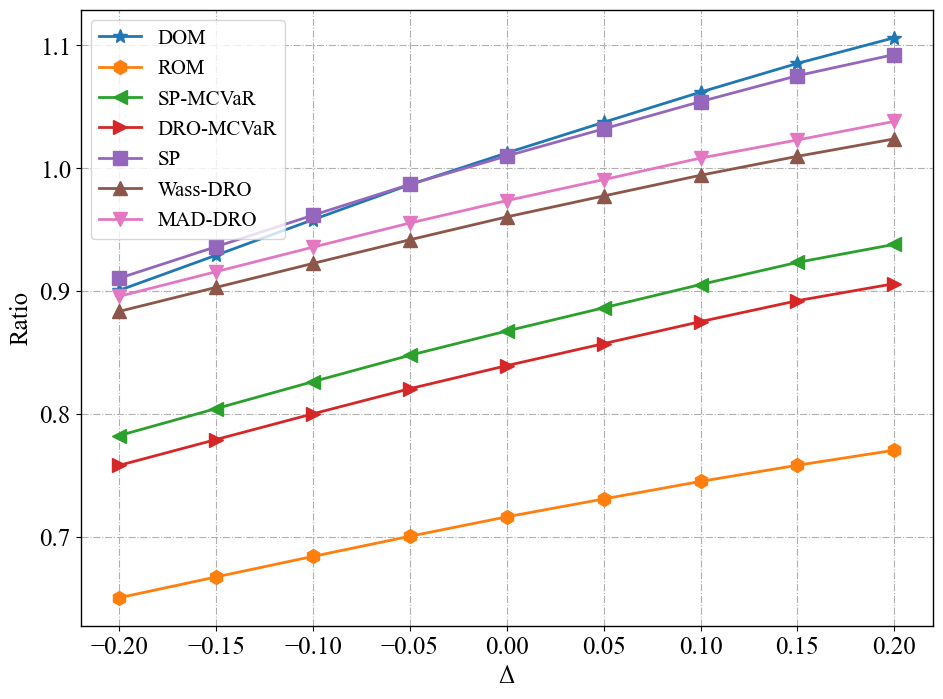

In [33]:
import matplotlib.pyplot as plt
import matplotlib

# 统一设置字体
plt.rcParams["font.family"] = 'Times New Roman'
 
# 分别设置mathtext公式的正体和斜体字体
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Times New Roman'  # 用于正常数学文本
matplotlib.rcParams['mathtext.it'] = 'Times New Roman:italic'  # 用于斜体数学文本
plt.rcParams.update({'font.size': 18})
x = np.arange(-0.2, 0.21, 0.05)
# 创建一个标准的图形窗口,并设置其尺寸
fig = plt.figure(figsize=(11, 8))
ax=plt.gca()
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
plt.grid(linestyle='-.')
plt.plot(x, dom_delta, marker = '*', markersize = 10, linewidth=2,  label='DOM')
plt.plot(x, rom_delta, marker = 'h', markersize = 10, linewidth=2,  label='ROM')
plt.plot(x, sp_mcvar_delta, marker = '<', markersize = 10, linewidth=2,  label='SP-MCVaR')
plt.plot(x, sp_mcvar_dro_delta, marker = '>', markersize = 10, linewidth=2,  label='DRO-MCVaR')
plt.plot(x, SP_delta, marker = 's', markersize = 10, linewidth=2,  label='SP')
plt.plot(x, wass_delta, marker = '^', markersize = 10, linewidth=2,  label='Wass-DRO')
plt.plot(x, mad_delta, marker = 'v', markersize = 10, linewidth=2,  label='MAD-DRO')
plt.legend(fontsize=15) 
plt.xlabel(r'$\Delta$', fontsize=18)
plt.ylabel('Ratio', fontsize=18)

# 设置x、y轴刻度字体大小
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.savefig('../figures/ratio_mean_total.pdf', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
df = pd.read_excel('SP_test_result.xlsx')
df.head()

,"(I,J,L)",sd,Delta,y,z,obj
0,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],965.714
1,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],938.671
2,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],1071.618
3,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],941.43
4,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],954.099


In [ ]:
open_num = list(map(eval, df['y']))
cost1 = list(map(lambda x: 300*x, open_num))
df['obj'] = pd.to_numeric(df['obj'], errors='coerce')

In [ ]:
infisible_num = []
for delta in np.arange(-0.2, 0.21, 0.05):
    delta = round(delta, 2)
    a = df[(df['(I,J,L)'] == '(12, 5, 5)') & (df['Delta'] == delta)]['obj']
    infisible_num.append(a.isna().sum())

In [ ]:
infisible_num

[0, 1, 3, 4, 4, 7, 5, 8, 11]

In [ ]:
open_num = list(map(eval, df['y']))
open_num = list(map(sum, open_num))
cost1 = list(map(lambda x: 300*x, open_num))
df['obj'] = pd.to_numeric(df['obj'], errors='coerce')
df.fillna(df['obj'].mean(), inplace=True) 
cost2 =df['obj'] - cost1
df['#O'] = open_num
df['cost1'] = cost1
df['cost2'] = cost2
df1 = df
df1

,"(I,J,L)",sd,Delta,y,z,obj,open_num,cost1,cost2
0,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],965.714,2.0,600.0,365.714
1,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],938.671,2.0,600.0,338.671
2,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],1071.618,2.0,600.0,471.618
3,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],941.430,2.0,600.0,341.430
4,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],954.099,2.0,600.0,354.099
...,...,...,...,...,...,...,...,...,...
14395,"(15, 6, 6)",9,0.2,"[1.0, 0.0, 0.0, 1.0, 1.0, 0.0]",[[1. 0. 0. 1. 0. 0.]\n [0. 0. 0. 0. 0. 0.]\n [...,2535.526,3.0,900.0,1635.526
14396,"(15, 6, 6)",9,0.2,"[1.0, 0.0, 0.0, 1.0, 1.0, 0.0]",[[1. 0. 0. 1. 0. 0.]\n [0. 0. 0. 0. 0. 0.]\n [...,2713.366,3.0,900.0,1813.366
14397,"(15, 6, 6)",9,0.2,"[1.0, 0.0, 0.0, 1.0, 1.0, 0.0]",[[1. 0. 0. 1. 0. 0.]\n [0. 0. 0. 0. 0. 0.]\n [...,2521.571,3.0,900.0,1621.571
14398,"(15, 6, 6)",9,0.2,"[1.0, 0.0, 0.0, 1.0, 1.0, 0.0]",[[1. 0. 0. 1. 0. 0.]\n [0. 0. 0. 0. 0. 0.]\n [...,2640.490,3.0,900.0,1740.490
